# **UAS SyntheticControl**



## **Penjelasan Dataset Synthetic**

Dataset Synthetic Control adalah dataset time series sintetis yang dirancang khusus untuk **meniru berbagai pola perilaku sinyal pengukuran** yang biasanya muncul pada sistem fisik seperti mesin industri, proses manufaktur, alat elektronik, maupun sensor proses. Setiap sampelnya terdiri dari **deretan 60 angka** yang mewakili **pengukuran berurutan dalam satuan waktu tertentu**, seperti detik ke-1 sampai detik ke-60. Angka-angka ini **tidak berasal dari mesin nyata**, tetapi dibangkitkan menggunakan fungsi matematika seperti sinusoida, fungsi linear, serta penambahan noise acak. Tujuan dari pembuatan angka sintetis ini adalah untuk **mensimulasikan pola umum** yang biasanya muncul pada data sensor dunia nyata, misalnya pola stabil (normal), pola naik-turun secara periodik seperti getaran mekanik (cyclic), pola meningkat bertahap seperti kenaikan suhu mesin (increasing trend), pola menurun bertahap seperti kehilangan tekanan (decreasing trend), atau perubahan mendadak ke atas/bawah seperti mesin mengalami lonjakan beban (shift). Pola "Valley" juga ditambahkan untuk meniru kondisi ketika sinyal turun terlebih dahulu lalu meningkat kembali seperti bentuk huruf U.

Secara struktur, dataset ini berisi **600 sampel** yang terbagi rata dalam **6 kategori utama**, di mana setiap kategori berisi 100 sampel yang mewakili pola tertentu. Semua nilai-nilai di dalam dataset mengalami **variasi kecil (noise)** sehingga meskipun satu kelas memiliki bentuk pola yang sama, setiap sampelnya tetap unik. Noise ini dibuat untuk mensimulasikan gangguan alami pada pengukuran sensor di dunia nyata, misalnya vibrasi kecil, perubahan lingkungan, error alat, dan lain-lain. Karena seluruh nilai dibuat secara matematis, dataset ini memberikan lingkungan terkontrol yang ideal untuk **melatih dan menguji algoritma machine learning**, khususnya yang memerlukan pengenalan pola (pattern recognition) pada sinyal waktu.

Dataset Synthetic Control sangat sering digunakan sebagai **benchmark standar internasional** dalam penelitian time series classification karena memiliki pola yang jelas, variasi antar kelas yang nyata, dan kompleksitas sedang. Tujuan akhirnya adalah membuat model mampu mengenali **bentuk pola** dari sinyal, bukan nilai absolutnya. Artinya, model belajar memahami struktur seperti: apakah sinyal naik terus? apakah turun pelan? apakah ada gelombang periodik? apakah ada perubahan mendadak? apakah ada lembah sebelum naik lagi? Dengan model yang dilatih pada dataset ini, peneliti dapat menguji apakah algoritma mampu membedakan *stabil vs tidak stabil*, *normal vs abnormal*, dan *pola sederhana vs pola kompleks*. Meski tidak berasal dari sensor nyata, konsep pola matematis inilah yang membuat dataset ini ideal untuk mengevaluasi performa model sebelum diterapkan ke sinyal mesin sungguhan.



## **Business Understanding**


Dalam konteks bisnis dan industri, dataset Synthetic Control digunakan sebagai **simulasi sinyal sensor** untuk memahami bagaimana sebuah sistem, mesin, atau proses produksi berperilaku dari waktu ke waktu. Setiap deretan angka mewakili **pengukuran kondisi operasional** selama 60 satuan waktu berturut-turut, misalnya suhu mesin, getaran motor, tekanan fluida, arus listrik, atau level produksi. Dengan mempelajari pola dari angka-angka ini, perusahaan dapat **mendeteksi apakah suatu kondisi berada dalam keadaan normal atau mulai menunjukkan potensi masalah**.

Setiap kelas pada dataset merepresentasikan **kondisi operasional yang berbeda**, yang secara nyata sangat dibutuhkan dalam industri. Misalnya, pola "Normal" menggambarkan mesin yang bekerja stabil dan tidak memerlukan tindakan. Pola "Cyclic" menggambarkan getaran berulang yang bisa terjadi pada mesin berputar atau pompa. Pola "Increasing Trend" dan "Decreasing Trend" menggambarkan tren kenaikan atau penurunan yang mungkin menandakan suhu yang semakin panas atau tekanan yang terus menurun. Pola "Upward Shift" dan "Downward Shift" mensimulasikan perubahan mendadak yang mengindikasikan kemungkinan lonjakan beban atau kerusakan komponen secara tiba-tiba. Sementara itu, pola “Valley” menggambarkan kondisi U-shape yang dapat muncul ketika kinerja turun dulu lalu pulih kembali, misalnya saat mesin mengalami pendinginan lalu kembali naik.

Dalam dunia bisnis, kemampuan untuk **mengklasifikasikan pola-pola kondisi ini** sangat penting untuk kegiatan seperti *predictive maintenance* (pemeliharaan prediktif), *quality control*, monitoring produksi, deteksi anomali, dan optimasi proses. Dengan menggunakan dataset ini, perusahaan dapat mengembangkan dan menguji sistem kecerdasan buatan yang mampu mengenali perubahan pola sinyal lebih cepat daripada manusia. Ketika model mampu membedakan pola normal dari pola abnormal, perusahaan bisa mengurangi downtime, mencegah kerusakan mesin besar, dan meningkatkan efisiensi operasional.

Walaupun dataset ini bersifat sintetis (dibuat secara matematis, bukan sensor nyata), pola-pola yang disimulasikan sangat mirip dengan fenomena nyata yang terjadi pada sinyal industri. Karena itulah dataset Synthetic Control dipakai sebagai **benchmark standar internasional** untuk melatih dan menguji model pendeteksi pola sebelum diaplikasikan pada data sensor yang sesungguhnya. Pemahaman bisnis utamanya adalah memastikan bahwa sistem monitoring berbasis machine learning dapat mengenali kondisi mesin secara akurat, sehingga perusahaan dapat mengambil keputusan lebih cepat dan lebih tepat berdasarkan pola data waktu yang diamati.


### **Tujuan Proyek**

Tujuan dari proyek ini adalah membangun sebuah model machine learning untuk mengklasifikasi pola time-series pada dataset Synthetic Control ke dalam 6 kelas berbeda.

### **Tujuan Analisis**

- Mengidentifikasi pola deret waktu secara otomatis

- Menjadi dasar sistem pendeteksi pola untuk aplikasi monitoring, forecasting, dan quality control


## **Data Preparation**

### **Upload Dataset ke Google Colab**

Langkah ini digunakan untuk memasukkan dataset dari komputer lokal ke environment Google Colab agar bisa diproses menggunakan Python.



Kode `from google.colab import files` dan `uploaded = files.upload()` digunakan di Google Colab untuk mengunggah file dari komputer lokal ke lingkungan kerja Colab. Baris pertama berfungsi mengimpor modul `files`, yaitu fitur bawaan Google Colab yang menyediakan fungsi upload dan download file. Baris kedua menjalankan fungsi `files.upload()`, yang akan menampilkan jendela pemilihan file sehingga pengguna dapat memilih file dari laptop. Setelah file dipilih, Colab akan mengunggahnya dan menyimpannya ke dalam direktori runtime (biasanya `/content`). File yang telah diunggah kemudian disimpan dalam variabel `uploaded` sebagai sebuah dictionary yang berisi nama file dan data filenya. Dengan cara ini, pengguna dapat memproses dataset atau file apa pun yang diunggah ke Colab menggunakan Python.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SyntheticControl.zip to SyntheticControl.zip


### **Menentukan Path File Dataset**

Path file digunakan untuk memudahkan pemanggilan dataset pada proses selanjutnya tanpa perlu menulis ulang nama file.

Baris kode `zip_path = "SyntheticControl.zip"` digunakan untuk menentukan nama atau lokasi file ZIP yang akan diproses oleh program. Nilai tersebut disimpan dalam variabel `zip_path` sehingga dapat digunakan kembali pada baris kode berikutnya tanpa perlu menuliskan nama file secara berulang. Dalam konteks pemrosesan dataset, baris ini memberi tahu program bahwa dataset yang ingin dibaca atau diekstrak berada dalam file bernama **SyntheticControl.zip** yang terletak di direktori kerja saat ini. Variabel ini kemudian biasanya dipakai bersama modul `zipfile` untuk membuka, membaca, atau mengekstrak isi file ZIP tersebut. Dengan kata lain, baris ini hanyalah penanda lokasi file ZIP agar program dapat mengaksesnya dengan mudah dan konsisten.


In [ ]:
zip_path = "SyntheticControl.zip"


### **Eksplorasi Isi File ZIP Dataset**

Langkah ini dilakukan untuk memastikan file dataset yang dibutuhkan, seperti data training dan testing, tersedia di dalam file ZIP.

Kode tersebut digunakan untuk **membuka file ZIP dan menampilkan daftar file di dalamnya**. Pertama, modul `zipfile` di-import karena diperlukan untuk bekerja dengan file berformat ZIP. Kemudian, variabel `zip_path` menyimpan nama file ZIP yang akan dibaca, yaitu *SyntheticControl.zip*. Selanjutnya, perintah `with zipfile.ZipFile(zip_path, 'r') as z:` membuka file ZIP tersebut dalam mode baca (`'r'`) menggunakan konteks *with*, sehingga file akan otomatis ditutup setelah selesai digunakan. Di dalam blok itu, fungsi `z.namelist()` dipanggil untuk mengambil dan mencetak daftar seluruh file atau folder yang ada di dalam ZIP. Secara sederhana, kode ini berfungsi untuk melihat isi paket ZIP tanpa perlu mengekstraknya terlebih dahulu.


In [ ]:
import zipfile

zip_path = "SyntheticControl.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())


['SyntheticControl.txt', 'SyntheticControl_TEST.arff', 'SyntheticControl_TEST.txt', 'SyntheticControl_TRAIN.arff', 'SyntheticControl_TRAIN.txt', 'SyntheticControl_TEST.ts', 'SyntheticControl_TRAIN.ts']


### **Membaca Data Training dari File ZIP**

Data dibaca langsung dari file ZIP tanpa mengekstraknya ke folder, kemudian dimuat ke dalam bentuk yang bisa diproses oleh Python.



Kode ini memanfaatkan modul `zipfile` untuk membaca isi file *SyntheticControl.zip* tanpa harus mengekstraknya ke folder. Variabel `zip_path` menyimpan nama file ZIP yang akan diakses. Kemudian blok `with zipfile.ZipFile(zip_path, "r") as z:` membuka file ZIP dalam mode baca sehingga Python dapat mengakses berkas-berkas di dalamnya. Di dalam blok tersebut, fungsi `z.open("SyntheticControl_TRAIN.txt")` digunakan untuk membuka file *SyntheticControl_TRAIN.txt* yang ada di dalam ZIP. Isi file tersebut dibaca menggunakan `.read()`, dikonversi menjadi teks dengan `.decode("utf-8")`, lalu dipisahkan menjadi daftar baris menggunakan `.splitlines()`. Hasil akhirnya disimpan ke dalam variabel `train_lines`. Pada baris terakhir, `train_lines[:10]` digunakan untuk menampilkan **10 baris pertama** dari file training, sehingga kita bisa melihat contoh data Synthetic Control langsung dari file ZIP.




In [ ]:
import zipfile

zip_path = "SyntheticControl.zip"

with zipfile.ZipFile(zip_path, "r") as z:
    train_lines = z.open("SyntheticControl_TRAIN.txt").read().decode("utf-8").splitlines()

train_lines[:10]


['   1.0000000e+00  -3.7693558e-01   1.2248643e+00   3.4387438e-01   3.2845403e-01  -3.3760945e-01   1.0265140e+00  -1.3309960e+00  -6.5780029e-01   1.4460774e+00  -8.4639658e-01   7.7620813e-01  -2.5405199e-01   1.6652325e+00   6.2547205e-01   1.2422580e+00   7.7620813e-01   1.1273524e+00  -1.0133987e+00  -6.9236218e-01  -1.0568689e+00  -1.2245759e+00  -2.3913907e-01   1.7317923e-01  -1.7277798e-01   8.2060860e-01  -1.4316089e+00  -3.3873708e-01  -1.6279013e+00  -1.1270640e+00   1.3599545e+00  -1.4346253e+00  -9.8306547e-01   1.5605883e+00  -4.7444748e-01  -2.7310895e-01  -5.5250774e-01  -1.1066538e+00   9.0207995e-01   2.4213387e-01  -8.6658118e-01   1.5268439e+00  -1.0946446e+00  -3.1626903e-01   5.3148400e-01   2.6429182e-01   1.1662557e+00  -5.7683638e-01  -3.3211225e-01   1.5163852e+00  -1.0466906e-01   3.7071200e-01  -1.5681650e+00   1.0218626e+00  -1.4297483e+00   1.3569663e+00   1.3727813e+00   6.6355779e-01   9.1834602e-01  -1.3117417e+00  -1.1971462e+00',
 '   1.0000000e+00 

## **Data Understanding (Eksplorasi Data/EDA)**

Dataset **Synthetic Control** merupakan dataset time series terstruktur yang terdiri dari 600 sampel sinyal buatan. Setiap sampel mewakili satu rangkaian data pengukuran yang berubah terhadap waktu. Secara keseluruhan, dataset ini dirancang untuk mensimulasikan berbagai pola sinyal yang sering muncul dalam dunia industri, manufaktur, maupun monitoring sensor. Berikut detail lengkap struktur datanya:

### **1. Jumlah Sampel: 600 Time-Series**

Dataset ini memiliki total **600 data time series**, di mana setiap satu baris mewakili **satu sinyal lengkap**. Sinyal tersebut dibuat menggunakan fungsi matematika seperti sinus, tren linear, dan perubahan mendadak, sehingga mampu meniru pola umum yang biasanya terjadi pada sensor di dunia nyata. Dengan jumlah data sebanyak 600, dataset ini cukup besar untuk melatih model machine learning dan sekaligus mengevaluasi performanya.

### **2. Panjang Tiap Time-Series: 60 Data Point**

Setiap time series terdiri dari **60 titik data** yang diambil secara berurutan. Angka-angka ini bisa dianggap sebagai nilai sensor pada waktu ke-1 sampai waktu ke-60. Dalam konteks dunia nyata, 60 titik ini bisa mewakili pengukuran per detik selama 1 menit, per milidetik selama 60 ms, atau interval lain tergantung definisi sistem. Panjang data yang konsisten memudahkan proses pelatihan algoritma karena setiap sampel memiliki dimensi yang sama.

### **3. Jumlah Kelas: 6 Pola Perilaku Sinyal**

Dataset Synthetic Control terbagi menjadi **6 kategori pola** yang berbeda. Setiap kelas merepresentasikan bentuk sinyal tertentu yang mengindikasikan kondisi atau perilaku spesifik. Kelas-kelas tersebut misalnya mencerminkan pola stabil, pola naik-turun periodik, pola menaik, pola menurun, maupun pola yang berubah mendadak. Setiap kelas menyediakan contoh variasi bentuk sinyal yang khas sehingga memaksa model untuk belajar membedakan bentuk, bukan nilai absolut.

### **4. Jumlah Data per Kelas: 100 Time-Series Tiap Kategori**

Setiap kelas berisi **100 sampel**, sehingga totalnya 6 × 100 = 600. Pembagian yang seimbang (balanced dataset) ini sangat penting dalam machine learning, karena model tidak akan condong ke salah satu kelas. Tiap sampel dalam satu kelas memiliki pola dasar yang sama, tetapi ditambahkan *noise* acak sehingga tetap bervariasi. Noise ini membuat dataset terlihat lebih realistis seperti data sensor asli yang biasanya tidak mulus.


### **5. Pola Dibuat dengan Fungsi Matematis**

Seluruh data adalah **sinyal buatan (sintetis)**, bukan rekaman dari mesin nyata. Angka-angka dihasilkan menggunakan persamaan matematis sehingga masing-masing kelas memiliki pola dasar yang sangat jelas. Tujuannya agar dataset menjadi standar benchmark internasional dalam penelitian *time series classification*.

### **6. Ada Noise atau Gangguan Kecil pada Tiap Sampel**

Meskipun pola dasar tiap kelas sama, setiap sampel diberi gangguan acak (**Gaussian noise**) agar lebih menyerupai sinyal pada mesin sungguhan. Noise ini membuat model tidak bisa menghafal pola mentah dan harus benar-benar belajar mengenali bentuk global sinyal.


Kolom pertama menyimpan label kelas (1–6), sedangkan 60 kolom berikutnya adalah nilai time series.



### **Pemeriksaan Awal Struktur Data**

Langkah ini digunakan untuk mengecek tipe data, jumlah kolom, dan memastikan tidak ada kesalahan format sebelum pemodelan.





Kode tersebut digunakan untuk **membaca isi file yang berada di dalam file ZIP** tanpa perlu mengekstraknya secara manual. Pertama, variabel `zip_path` menyimpan nama file ZIP yang akan dibuka, yaitu *"SyntheticControl.zip"*. Kemudian, fungsi `zipfile.ZipFile()` digunakan untuk membuka file ZIP tersebut dalam mode baca (`'r'`). Setelah ZIP berhasil dibuka, kode mengakses file *"SyntheticControl_TRAIN.txt"* yang ada di dalam ZIP menggunakan `z.open()`. Isi file tersebut dibaca dalam bentuk byte, lalu di-*decode* ke format teks UTF-8 agar bisa diproses sebagai string. Setelah itu, teks yang berisi ratusan baris data dipisahkan menjadi daftar baris menggunakan `splitlines()`, sehingga setiap elemen dalam list mewakili satu sampel time-series. Terakhir, `sample[:5]` menampilkan **5 baris pertama dari dataset training**, yang biasanya berisi label kelas pada kolom pertama diikuti 60 nilai time-series pada kolom berikutnya.

In [ ]:
import zipfile

zip_path = "SyntheticControl.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    sample = z.open("SyntheticControl_TRAIN.txt").read().decode("utf-8").splitlines()

sample[:5]


['   1.0000000e+00  -3.7693558e-01   1.2248643e+00   3.4387438e-01   3.2845403e-01  -3.3760945e-01   1.0265140e+00  -1.3309960e+00  -6.5780029e-01   1.4460774e+00  -8.4639658e-01   7.7620813e-01  -2.5405199e-01   1.6652325e+00   6.2547205e-01   1.2422580e+00   7.7620813e-01   1.1273524e+00  -1.0133987e+00  -6.9236218e-01  -1.0568689e+00  -1.2245759e+00  -2.3913907e-01   1.7317923e-01  -1.7277798e-01   8.2060860e-01  -1.4316089e+00  -3.3873708e-01  -1.6279013e+00  -1.1270640e+00   1.3599545e+00  -1.4346253e+00  -9.8306547e-01   1.5605883e+00  -4.7444748e-01  -2.7310895e-01  -5.5250774e-01  -1.1066538e+00   9.0207995e-01   2.4213387e-01  -8.6658118e-01   1.5268439e+00  -1.0946446e+00  -3.1626903e-01   5.3148400e-01   2.6429182e-01   1.1662557e+00  -5.7683638e-01  -3.3211225e-01   1.5163852e+00  -1.0466906e-01   3.7071200e-01  -1.5681650e+00   1.0218626e+00  -1.4297483e+00   1.3569663e+00   1.3727813e+00   6.6355779e-01   9.1834602e-01  -1.3117417e+00  -1.1971462e+00',
 '   1.0000000e+00 

### **Memuat dan Memisahkan Dataset (Load & Split Dataset)**

Dataset dipisahkan menjadi data training dan testing serta antara fitur (time series) dan label kelas agar bisa digunakan dalam proses pelatihan dan evaluasi model.





Kode tersebut digunakan untuk membuka file dataset SyntheticControl yang berada di dalam sebuah file ZIP, kemudian membacanya menjadi bentuk tabel menggunakan pandas. Pertama, library seperti numpy, pandas, dan zipfile di-import untuk menangani data numerik, membaca tabel, dan membuka file ZIP. Setelah itu, variabel `zip_path` menyimpan nama file ZIP yang akan dibuka. Dengan menggunakan `zipfile.ZipFile`, file ZIP dibuka dan dua file penting di dalamnya—`SyntheticControl_TRAIN.txt` dan `SyntheticControl_TEST.txt`—dibaca menggunakan `pd.read_csv` dengan pemisah spasi (`sep=r"\s+"`) dan tanpa header. Format dataset UCR menempatkan label kelas pada kolom pertama, sedangkan data time-series berada pada kolom setelahnya. Karena itu, bagian berikutnya memisahkan kolom pertama sebagai `y_train` dan `y_test` (label), serta kolom sisanya sebagai `X_train` dan `X_test` (fitur data). Terakhir, perintah `X_train.shape, X_test.shape` digunakan untuk menampilkan ukuran data latih dan data uji yang sudah berhasil dimuat.

In [ ]:
import numpy as np
import pandas as pd
import zipfile

zip_path = "SyntheticControl.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
   with zipfile.ZipFile(zip_path, 'r') as z:
    train = pd.read_csv(z.open("SyntheticControl_TRAIN.txt"),
                        sep=r"\s+",
                        header=None)

    test = pd.read_csv(z.open("SyntheticControl_TEST.txt"),
                       sep=r"\s+",
                       header=None)


# UCR format: first column = label, rest = features
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

X_train.shape, X_test.shape


((300, 60), (300, 60))



Kode ini digunakan untuk memahami struktur dan karakteristik awal dari dataset Synthetic Control sebelum digunakan dalam proses modelling. Baris `print(train.info())` berfungsi menampilkan informasi lengkap tentang dataset pelatihan, seperti jumlah baris, jumlah kolom, tipe masing-masing kolom, serta apakah ada nilai kosong. Berikutnya, `print(train.describe())` menghasilkan statistik deskriptif untuk seluruh kolom numerik, misalnya nilai minimum, maksimum, rata-rata, dan distribusi kuartil, sehingga membantu melihat pola dasar dan rentang nilai pada setiap titik time-series. Setelah itu, bagian visualisasi menggunakan `matplotlib` menampilkan salah satu contoh time-series dari data pelatihan dengan perintah `plt.plot(X_train.iloc[0])`. Judul grafik juga menunjukkan kelas dari sampel tersebut melalui `plt.title(f"Contoh Time Series (kelas {y_train.iloc[0]})")`. Plot ini membantu melihat langsung bentuk sinyal, apakah termasuk pola normal, cyclic, trend, shift, atau lainnya. Dengan proses EDA ini, kita bisa memahami isi dataset secara lebih jelas sebelum melanjutkan ke langkah pemodelan.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    float64
 3   3       300 non-null    float64
 4   4       300 non-null    float64
 5   5       300 non-null    float64
 6   6       300 non-null    float64
 7   7       300 non-null    float64
 8   8       300 non-null    float64
 9   9       300 non-null    float64
 10  10      300 non-null    float64
 11  11      300 non-null    float64
 12  12      300 non-null    float64
 13  13      300 non-null    float64
 14  14      300 non-null    float64
 15  15      300 non-null    float64
 16  16      300 non-null    float64
 17  17      300 non-null    float64
 18  18      300 non-null    float64
 19  19      300 non-null    float64
 20  20      300 non-null    float64
 21  21      300 non-null    float64
 22  22

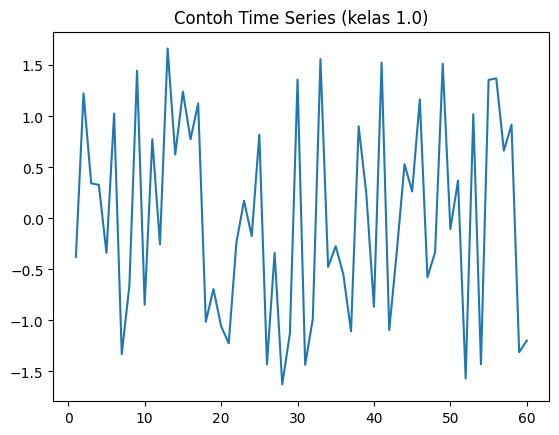

In [ ]:
print(train.info())
print(train.describe())

import matplotlib.pyplot as plt

plt.plot(X_train.iloc[0])
plt.title(f"Contoh Time Series (kelas {y_train.iloc[0]})")
plt.show()


## **Preprocessing Data**


### **Normalisasi / Standarisasi Data (Standardization)**

Standarisasi dilakukan agar setiap fitur memiliki skala yang sama, sehingga model SVM dapat bekerja lebih optimal dan hasilnya tidak bias terhadap skala data tertentu.



Kode ini bertujuan untuk menormalkan seluruh nilai fitur pada dataset agar berada pada skala yang sama sebelum digunakan dalam proses pelatihan model machine learning. Pertama, `StandardScaler` dari scikit-learn diinisialisasi sebagai `scaler`. Metode ini akan mengubah setiap kolom fitur sehingga memiliki **rata-rata (mean) = 0** dan **standar deviasi = 1**, sehingga semua titik time-series berada pada skala yang seragam. Kemudian, `scaler.fit_transform(X_train)` menghitung nilai mean dan standar deviasi dari data pelatihan, serta sekaligus menerapkan transformasi tersebut ke `X_train`, menghasilkan versi terstandardisasi yang disimpan pada `X_train_scaled`. Untuk data pengujian, digunakan `scaler.transform(X_test)` agar test data dinormalisasi menggunakan **parameter yang sama** dari training (bukan dihitung ulang), sehingga tidak terjadi data leakage. Proses standarisasi ini penting karena banyak model seperti SVM, KNN, Logistic Regression, dan Neural Network bekerja jauh lebih optimal ketika fitur-fiturnya memiliki skala yang seragam.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Pemodelan Data**

### **Pelatihan Model SVM (Support Vector Machine) dengan Kernel RBF**

Model SVM dengan kernel RBF digunakan karena mampu menangani pola data yang tidak linear, sehingga cocok untuk klasifikasi time series.



Kode ini digunakan untuk melatih model klasifikasi menggunakan algoritma Support Vector Machine (SVM). Pertama, sebuah objek model SVM dibuat dengan `SVC(kernel="rbf", C=1, gamma='scale')`. Parameter `kernel="rbf"` memerintahkan model untuk menggunakan **Radial Basis Function**, yaitu kernel yang paling umum dipakai karena mampu mengenali pola non-linear pada data time series seperti pada dataset Synthetic Control. Nilai `C=1` mengatur tingkat regulasi: nilai ini menentukan seberapa ketat model berusaha memisahkan kelas—semakin besar C semakin keras model memaksa pemisahan, tetapi dapat meningkatkan risiko overfitting. Parameter `gamma='scale'` mengatur seberapa jauh pengaruh satu titik data dalam ruang fitur, dan pilihan `'scale'` membiarkan scikit-learn menghitungnya secara otomatis berdasarkan variansi data. Setelah model diinisialisasi, fungsi `model.fit(X_train_scaled, y_train)` digunakan untuk melatih model menggunakan data pelatihan yang sebelumnya telah dinormalisasi. Pada tahap ini, SVM akan mencari batas pemisah terbaik di ruang fitur yang mampu membedakan tiap kelas pola time-series dalam dataset.


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", C=1, gamma='scale')
model.fit(X_train_scaled, y_train)



SVC(C=1)


## **Evaluasi Model Menggunakan Akurasi, Classification Report, dan Confusion Matrix**

Evaluasi dilakukan untuk mengukur performa model, melihat tingkat ketepatan prediksi, serta mengetahui kesalahan klasifikasi pada setiap kelas.



Kode ini digunakan untuk mengevaluasi performa model SVM yang telah dilatih sebelumnya. Pertama, model melakukan prediksi terhadap data uji melalui `model.predict(X_test_scaled)` sehingga menghasilkan label prediksi `y_pred`. Nilai akurasi kemudian dihitung dengan `accuracy_score(y_test, y_pred)` untuk mengetahui persentase prediksi yang benar dibandingkan total data uji. Selanjutnya, fungsi `classification_report()` menampilkan metrik evaluasi lebih lengkap seperti **precision**, **recall**, dan **F1-score** untuk masing-masing kelas, sehingga membantu melihat kelas mana yang diprediksi dengan baik dan mana yang masih sulit dibedakan oleh model.

Setelah itu, dibuat **confusion matrix** menggunakan `confusion_matrix(y_test, y_pred)` untuk menggambarkan perbandingan antara label sebenarnya dan label prediksi. Confusion matrix ini divisualisasikan menggunakan `sns.heatmap()` dengan anotasi angka dan warna gradasi biru agar mudah dibaca. Label sumbu “Predicted” dan “Actual” menunjukkan arah perbandingan antara prediksi model dan kondisi sebenarnya. Visualisasi ini sangat berguna untuk melihat pola kesalahan model, misalnya kelas mana yang sering tertukar atau sulit dipisahkan dari kelas lain.

Akurasi: 0.9833333333333333

Classification Report:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        50
         3.0       1.00      0.96      0.98        50
         4.0       1.00      0.94      0.97        50
         5.0       0.96      1.00      0.98        50
         6.0       0.94      1.00      0.97        50

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



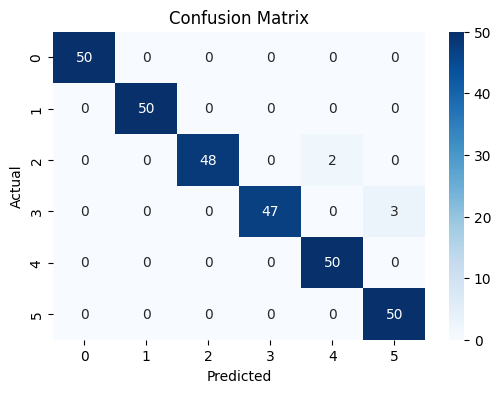

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **Tampilan**

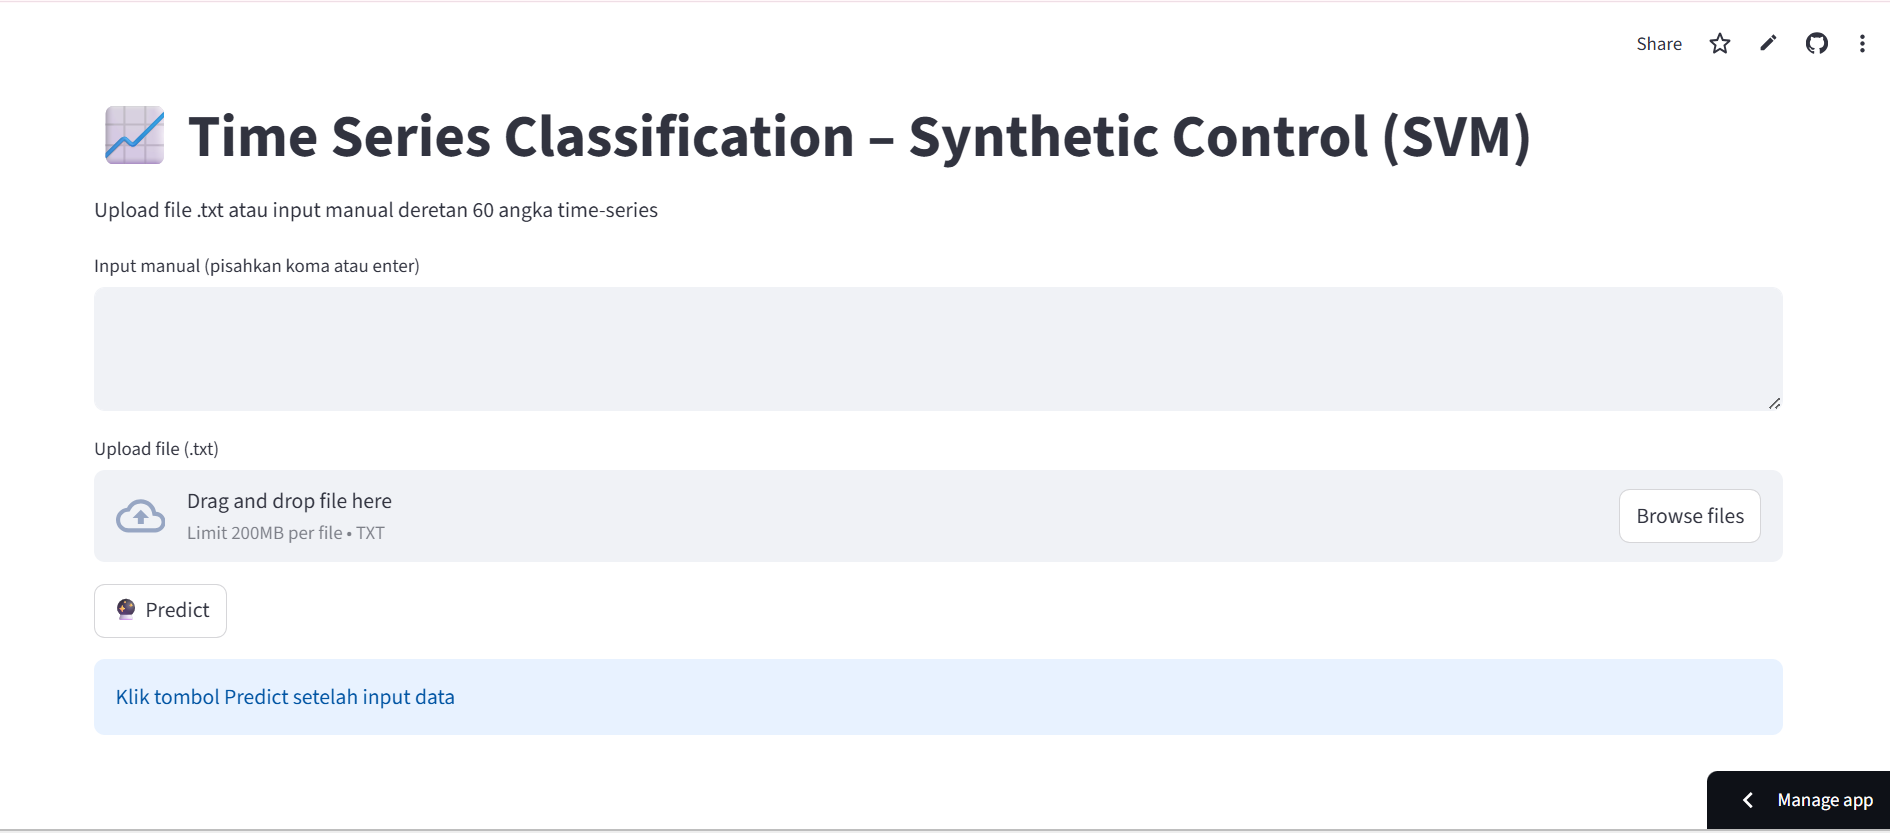

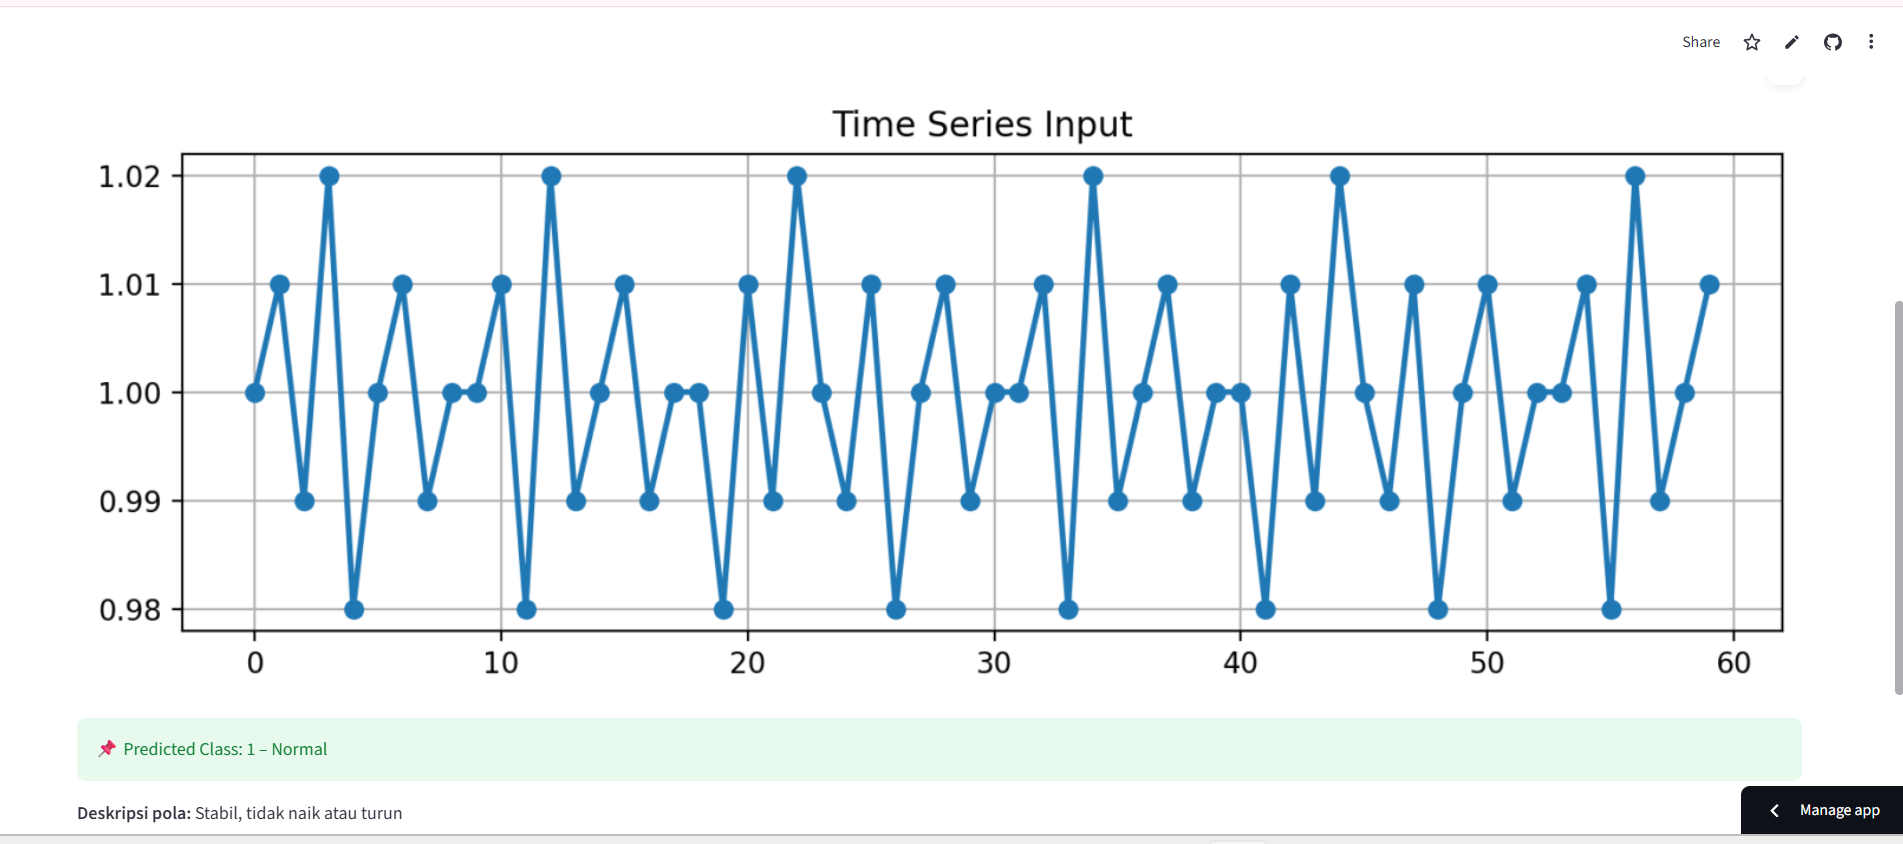

## **Link Deploy**

https://uaspsd-herlynabila.streamlit.app/